# Definition of the problem to be solved


In this case study we will use our neural network to make ice cream sales predictions based on temperature

# **Step 1**: Library import

In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense


# **Step 2**: Database import



In [3]:
sales_df = pd.read_csv('/content/SalesData.csv')
sales_df.reset_index(drop = True, inplace = True)

In [4]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [5]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# **Step 3**: Data visualization


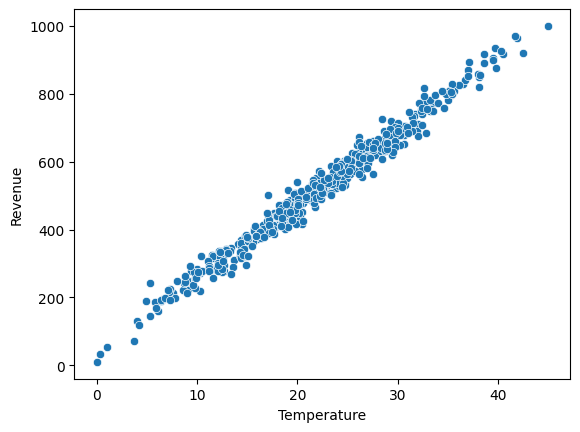

In [8]:
sns.scatterplot(x = sales_df['Temperature'], y = sales_df['Revenue']);

# Step 4: Training database configuration

In [74]:
x_train, x_test, y_train, y_test = train_test_split(sales_df['Temperature'],
                                                                  sales_df['Revenue'],
                                                                  test_size = 0.3,
                                                                  random_state = 0)

# Step 5: Model building and training

In [51]:
# Creation of the neural network structure with the Sequential class (sequence of layers)
modelo = Sequential()
# first hidden layer, 1 neurons, 1 input neurons
modelo.add(Dense(units = 3, input_dim = 1))
modelo.add(Dense(units = 2))
modelo.add(Dense(units = 1))
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')
epochs_hist = modelo.fit(x_train, y_train, epochs = 1000 )


Epoch 1/1000
11/11 [==============================] - 1s 2ms/step - loss: 150229.7969
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 21183.0059
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 8732.4424
Epoch 4/1000
11/11 [==============================] - 0s 2ms/step - loss: 3072.8286
Epoch 5/1000
11/11 [==============================] - 0s 2ms/step - loss: 1661.8276
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 1185.8038
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 973.9825
Epoch 8/1000
11/11 [==============================] - 0s 3ms/step - loss: 846.1385
Epoch 9/1000
11/11 [==============================] - 0s 2ms/step - loss: 787.1441
Epoch 10/1000
11/11 [==============================] - 0s 2ms/step - loss: 763.7955
Epoch 11/1000
11/11 [==============================] - 0s 2ms/step - loss: 783.3636
Epoch 12/1000
11/11 [==============================] - 0s 3ms/step - loss: 7

# Step 6: Model evaluation

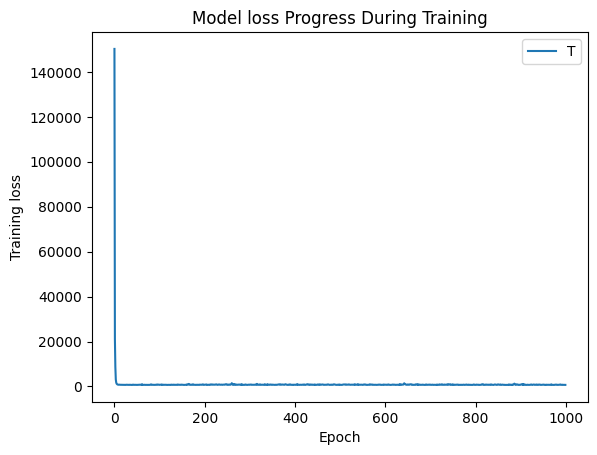

In [52]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend('Training loss');

In [53]:
modelo.get_weights()

[array([[-1.0622447,  0.0075387,  2.8917348]], dtype=float32),
 array([-0.9214713,  0.5720198,  2.5707052], dtype=float32),
 array([[-0.10387585,  1.0831726 ],
        [ 0.13370071, -0.02851175],
        [-0.00701639, -2.9780717 ]], dtype=float32),
 array([-2.4325793, -7.512847 ], dtype=float32),
 array([[-1.2569143e-03],
        [-2.2006855e+00]], dtype=float32),
 array([11.350941], dtype=float32)]

In [54]:
y_prev = modelo.predict(x_test)
r2 = r2_score(y_test, y_prev)
r2

5/5 [==============================] - 0s 3ms/step


0.9850039272028086

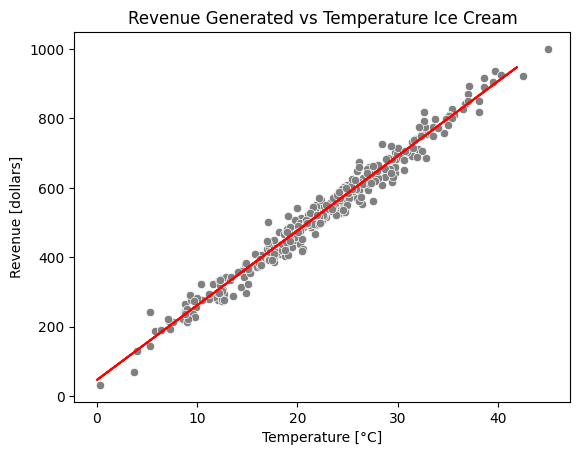

In [59]:
sns.scatterplot(x = x_train, y = y_train, color = 'gray')
plt.plot(x_test, y_prev, color = 'red')
plt.xlabel('Temperature [°C]')
plt.ylabel('Revenue [dollars]')
plt.title('Revenue Generated vs Temperature Ice Cream');


# Step 7: Confirming data using sklearn

In [77]:
from sklearn.linear_model import LinearRegression
if isinstance(y_train, pd.Series):
    x_train = x_train.values.reshape(-1, 1)
if isinstance(y_train, pd.Series):
    y_train = y_train.values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [78]:
regressor.coef_

array([[21.37822239]])

In [79]:
regressor.intercept_

array([46.91550105])

In [85]:
if isinstance(x_test, pd.Series):
    x_test = x_test.values.reshape(-1, 1)

predict = regressor.predict(x_test)

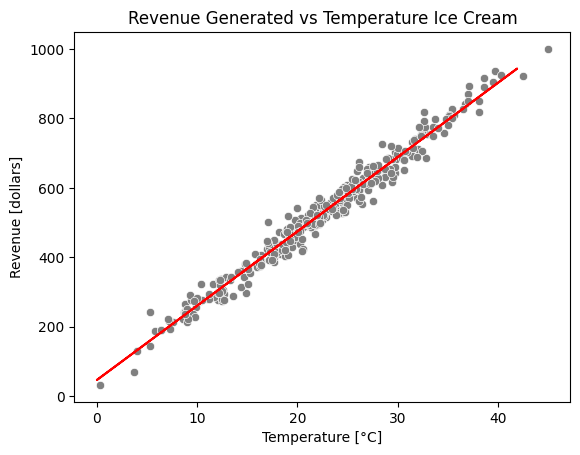

In [87]:
x_train_flatten = x_train.flatten()
y_train_flatten = y_train.flatten()
x_test_flatten = x_test.flatten()
predict_flatten = predict.flatten()

sns.scatterplot(x = x_train_flatten, y = y_train_flatten, color = 'gray')
plt.plot(x_test, predict_flatten, color = 'red')

plt.xlabel('Temperature [°C]')
plt.ylabel('Revenue [dollars]')
plt.title('Revenue Generated vs Temperature Ice Cream');